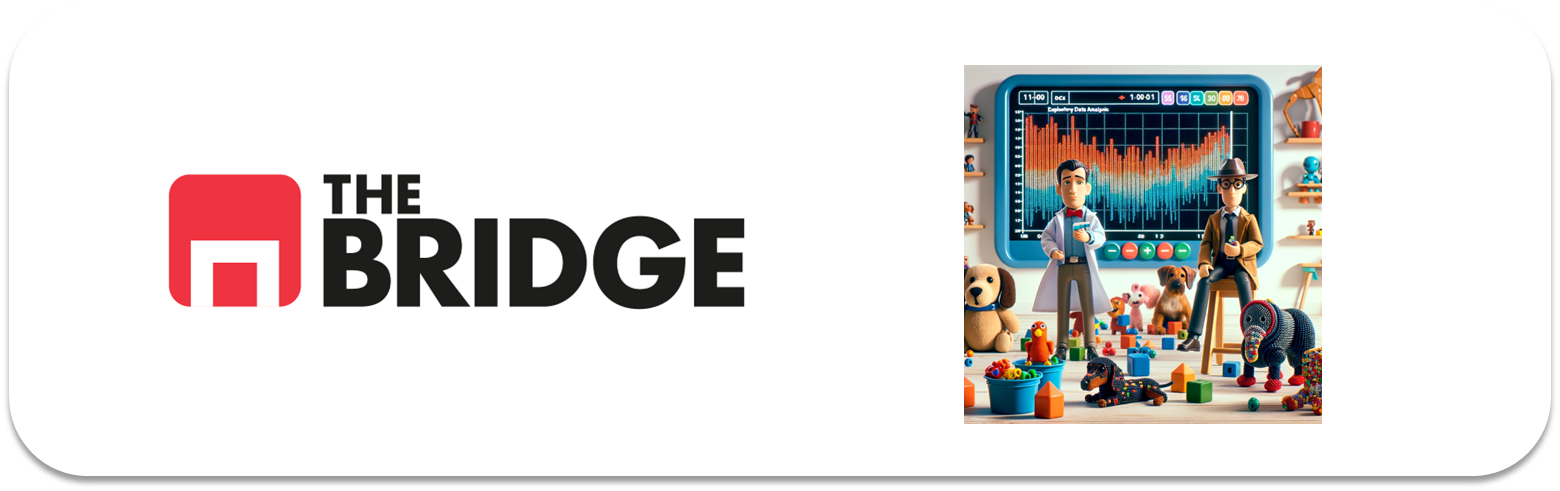

## PRACTICA OBLIGATORIA: **Análisis Multivariante**

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [42]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bootcampviztools import (
    plot_categorical_numerical_relationship,
    plot_combined_graphs,
    pinta_distribucion_categoricas,
    plot_grouped_boxplots,
    plot_categorical_relationship_fin,
    plot_grouped_histograms,
    grafico_dispersion_con_correlacion,
    bubble_plot
)

## #1: Titanic

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [43]:
titanic_df = pd.read_csv("./data/titanic.csv")
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [44]:
titanic_copy = titanic_df.copy()

# Eliminar las columnas que no vamos a emplear
titanic_copy = titanic_copy.drop(columns=["deck", "survived", "pclass", "embarked"])

# Verificar el resultado
display(titanic_copy)
print("Columnas restantes:", titanic_copy.columns.tolist())

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


Columnas restantes: ['sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [45]:
# Crear la nueva columna ANTES de eliminar las originales
titanic_copy["family_members"] = titanic_copy["parch"] + titanic_copy["sibsp"]

# Ahora sí, eliminar las columnas originales
titanic_copy = titanic_copy.drop(columns=["parch", "sibsp"])

In [46]:
display(titanic_copy)

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [47]:
# Calcular la moda de la columna embark_town
embark_mode = titanic_copy["embark_town"].mode()[0]

# Imputar la moda en los valores nulos
titanic_copy["embark_town"] = titanic_copy["embark_town"].fillna(embark_mode)

# Verificar que ya no haya nulos
print(titanic_copy["embark_town"].isnull().sum())
print("Moda imputada en embark_town:", embark_mode)

0
Moda imputada en embark_town: Southampton


In [48]:
titanic_copy

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [49]:
# Calcular la media de edad por grupo en 'who'
age_means_by_group = titanic_copy.groupby("who")["age"].mean()

# Imputar valores nulos según la media del grupo correspondiente
titanic_copy["age"] = titanic_copy.apply(
    lambda row: age_means_by_group[row["who"]] if pd.isnull(row["age"]) else row["age"],
    axis=1
)

# Verificar
print(titanic_copy["age"].isnull().sum())
print("Medias por grupo (who):")
print(age_means_by_group)

0
Medias por grupo (who):
who
child     6.369518
man      33.173123
woman    32.000000
Name: age, dtype: float64


### #1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

1.6.1.En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

- Cambio la variable alive a binaria porque con yes/no solo puede contar frecuencias

In [50]:
# 1.6 Creo variable binaria de supervivencia desde 'alive' ('yes'/'no')
titanic_copy["alive_bin"] = titanic_copy["alive"].map({"yes": 1, "no": 0})
titanic_copy



,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,alive_bin
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1,0
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0,1
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0,1
888,female,32.0,23.4500,Third,woman,False,Southampton,no,False,3,0
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0,1


In [51]:

#Aqui agrupo por who y calculo el numero de supervivientes absoluto y la proporcion de supervivientes dentro de un grupo relativo 
who_stats = titanic_copy.groupby("who")["alive_bin"].agg(
    alive_count="sum", total="count")
who_stats["alive_rate"] = who_stats["alive_count"] / who_stats["total"]
print(who_stats)

       alive_count  total  alive_rate
who                                  
child           49     83    0.590361
man             88    537    0.163873
woman          205    271    0.756458


- Aqui responde directamente que mas mujeres muieron en terminso absolutos y en procentaje mujeres y niños tuvieron una mayor tasa de superviviencia.

In [52]:
sex_stats = titanic_copy.groupby("sex")["alive_bin"].agg(
    alive_count="sum", total="count")
sex_stats["alive_rate"] = sex_stats["alive_count"] / sex_stats["total"]
print(sex_stats)

        alive_count  total  alive_rate
sex                                   
female          233    314    0.742038
male            109    577    0.188908


- Aqui vemos que la tasa de superviviencia es mucho mayor en las mujeres que los hombres

In [53]:
#Aqui aplicamos chi-cuadrado de sexo vs supervivencia
from scipy.stats import chi2_contingency
import pandas as pd

tabla_sex = pd.crosstab(titanic_copy["sex"], titanic_copy["alive_bin"])
chi2, p, dof, expected = chi2_contingency(tabla_sex)

print("Tabla de contingencia sexo vs supervivencia:\n", tabla_sex)
print("Valor Chi2:", chi2, "p-value:", p, "Grados de libertad:", dof)
print("Frecuencias esperadas si fueran independientes:\n", expected)

Tabla de contingencia sexo vs supervivencia:
 alive_bin    0    1
sex                
female      81  233
male       468  109
Valor Chi2: 260.71702016732104 p-value: 1.1973570627755645e-58 Grados de libertad: 1
Frecuencias esperadas si fueran independientes:
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


- Es muy inferior a 0,05 por lo que podemos decir que la supervivencia en el Titanic esta significativamente asociada al sexo de los pasajeros.

In [54]:
# Creo columna age_group: niño si edad < 16, adulto si edad >= 16 Esto es una estimacion personal
titanic_copy["age_group"] = np.where(titanic_copy["age"] < 16, "child", "adult")

# Ahora sí puedes hacer la tabla de contingencia
tabla_agegrp = pd.crosstab(titanic_copy["age_group"], titanic_copy["alive_bin"])
chi2, p, dof, expected = chi2_contingency(tabla_agegrp)

print("Tabla de contingencia niño/adulto vs supervivencia:\n", tabla_agegrp)
print("Valor Chi2:", chi2, "p-value:", p, "Grados de libertad:", dof)
print("Frecuencias esperadas si fueran independientes:\n", expected)
display(titanic_copy)


Tabla de contingencia niño/adulto vs supervivencia:
 alive_bin    0    1
age_group          
adult      515  293
child       34   49
Valor Chi2: 15.556993340077092 p-value: 8.005497211300105e-05 Grados de libertad: 1
Frecuencias esperadas si fueran independientes:
 [[497.85858586 310.14141414]
 [ 51.14141414  31.85858586]]


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,alive_bin,age_group
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1,0,adult
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1,1,adult
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0,1,adult
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1,1,adult
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0,0,adult
...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0,0,adult
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0,1,adult
888,female,32.0,23.4500,Third,woman,False,Southampton,no,False,3,0,adult
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0,1,adult


- Este resultado de es menor que 0,05 nos confirma que hay una relacion significativa entre ser niño/adulto y la superviviencia del titanic

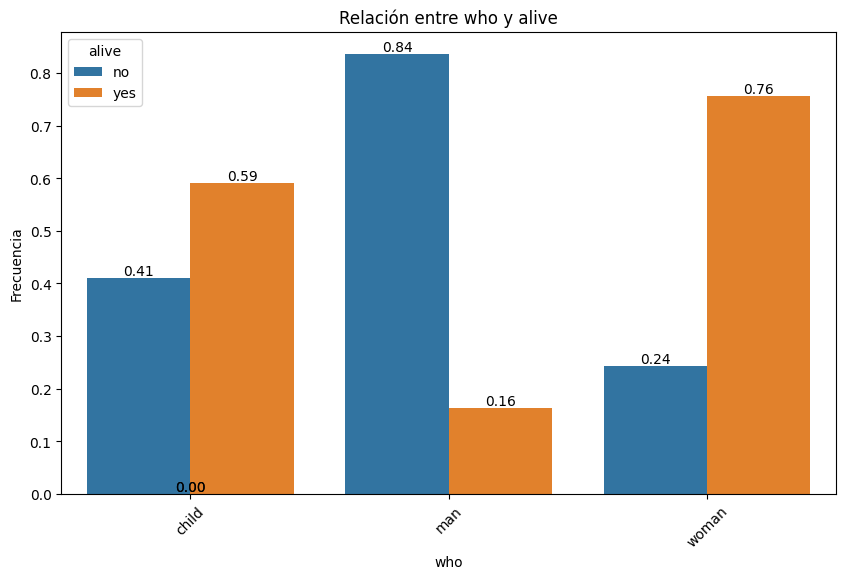

In [55]:
plot_categorical_relationship_fin(titanic_copy, "who", "alive", relative_freq=True, show_values=True)

- Aqui se puede observar que las mujeres y los niños tienen tasas de superviviencia mas altas que los hombres.

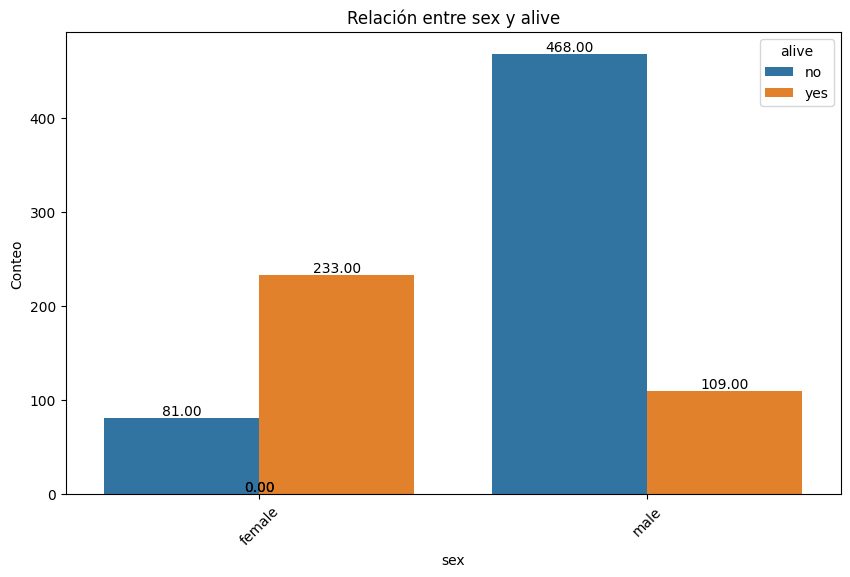

In [56]:
plot_categorical_relationship_fin(titanic_copy, "sex", "alive", relative_freq=False, show_values=True)

- Esta grafica me da una idea muy clara de por donde epuede ir la relacion aunque no puedo afirmarlo estadisticamente sin el test chi-cuadrado. Pero observo qe 233 mujeres sobrevivieron y 109 nombres y aunque habia muchos mas hombres sobrevivieron muchas mas mujeres por lo que para mi para hacerme una primera idea indica que el sexo importo en la superviviencia del titanic.

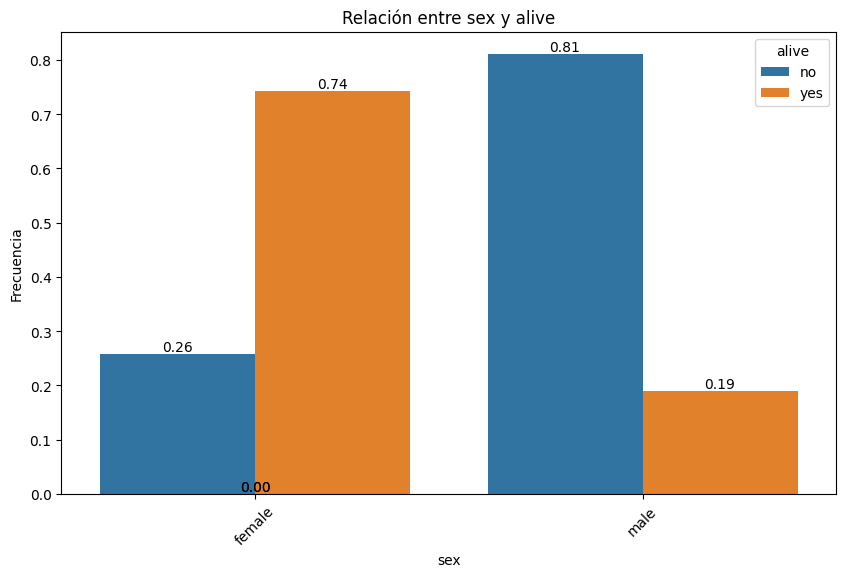

In [57]:
plot_categorical_relationship_fin(titanic_copy, "sex", "alive", relative_freq=True, show_values=True)

- Aqui viendo la frecuencia relativa el 74%de las mujeres obrevivieron por tan solo el 19% de los hombres esto nos indica una diferencia proporcional muy marcada

#1.61En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

- En terminos absolutos sobrevivieron mas mujeres (233), luego hombres(109) y luego niños(52).
- Em termino relativos la superviviencia fue mayor en mujeres 74%, luego niños 63% y luego muy baja 19% de hombres.
- Si existe relacion significativa entre sexo y supervivencia  p-value es muy inferior a 0,05. Asique como conlcusion si hay una relacion estadistica significativa entre el sexo y la superviviencia.
- Si existe relacion signficativa entre ser niño/adulto y la supervivencia tambien es p menor de 0,05(esto significa que la probabilidad que los datos observados se deban al azar es muy baja)


- En términos absolutos, sobrevivieron más mujeres. En términos relativos, las mujeres y los niños tuvieron tasas de supervivencia mucho más altas que los hombres. El test chi‑cuadrado confirma que tanto el sexo como la edad (niño/adulto) están estadísticamente relacionados con la supervivencia. Las gráficas lo muestran claramente: los hombres fueron el grupo con menor probabilidad de sobrevivir.”

1.6.2 En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

- Aqui vamos a ver la tasa de supervivencia del titanic segun la clase

In [48]:
class_stats = titanic_copy.groupby("class")["alive_bin"].agg(
    alive_count="sum", total="count")
class_stats["alive_rate"] = class_stats["alive_count"] / class_stats["total"]
print(class_stats)

        alive_count  total  alive_rate
class                                 
First           136    216    0.629630
Second           87    184    0.472826
Third           119    491    0.242363


- Aqui podemos observar que en terminos absolutos la clase donde sobrevivieron mas pasajeros es primera clase (First). Y en terminos relativos tambien primera clase es donde sobrevivio mas gente casi un 63%.

In [49]:
from scipy.stats import chi2_contingency
tabla_class = pd.crosstab(titanic_copy["class"], titanic_copy["alive_bin"])
chi2, p, dof, expected = chi2_contingency(tabla_class)

print("Chi-cuadrado clase vs supervivencia:")
print(tabla_class)
print("Valor Chi2:", chi2, "p-value:", p)

Chi-cuadrado clase vs supervivencia:
alive_bin    0    1
class              
First       80  136
Second      97   87
Third      372  119
Valor Chi2: 102.88898875696056 p-value: 4.549251711298793e-23


- Aqui vamos a ver la prueba de independencia de chi-cuadrado entre la clase pasajero y su supervivencia en el Titanic. Al ser menor p value del 0,05 quiere decir que hay una dependencia estadisticamente significativa entre la clase y la supervivencia en el titanic.

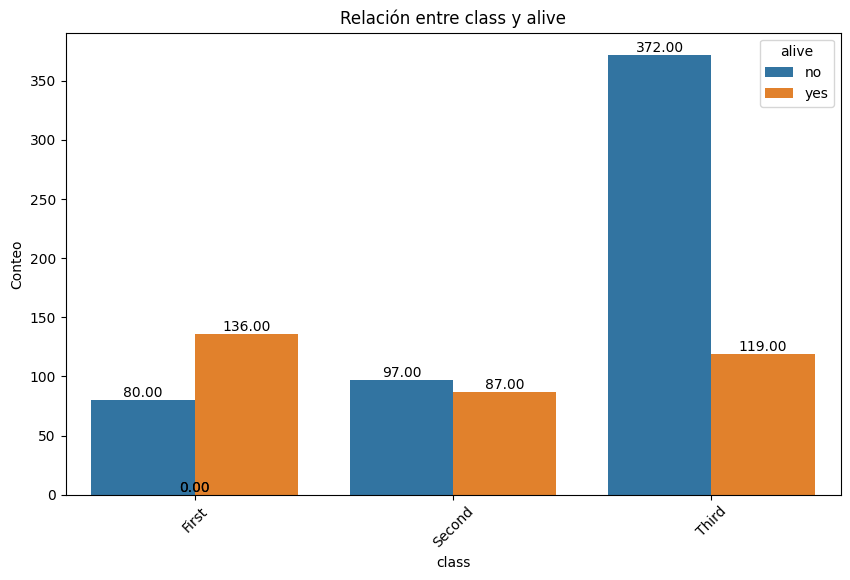

In [50]:
plot_categorical_relationship_fin(titanic_copy, "class", "alive", relative_freq=False, show_values=True)

- En esta grafica podemos ver los supervivientes y fallecidos por clase en terminso absolutos.

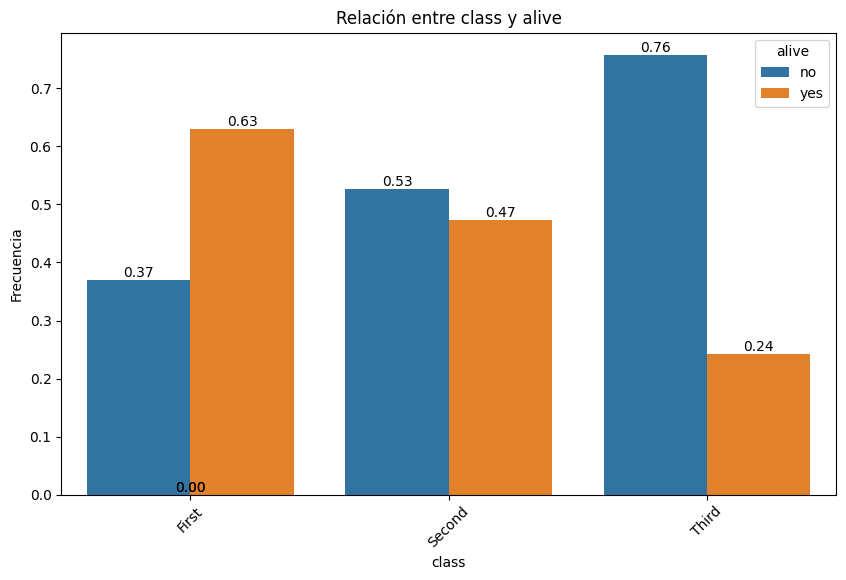

In [51]:
plot_categorical_relationship_fin(titanic_copy, "class", "alive", relative_freq=True, show_values=True)

Estas gráficas confirman visualmente lo que los datos y el chi‑cuadrado ya han mostrado:

- First Class tiene una tasa de supervivencia mucho mayor e terminso absolutos y tambien relativos como se ve en esta ultima grafica.

Conclusión final:
“En términos absolutos, sobrevivieron más pasajeros de First Class luego tercera clase y luego segunda clase. En términos relativos, la tasa de supervivencia fue mucho mayor en First Class (63%), seguida de Second (47%) y muy baja en Third (24%). El test chi‑cuadrado confirma que la clase en la que se viajaba está estadísticamente relacionada con la supervivencia. Las gráficas lo muestran claramente: viajar en First Class aumentaba significativamente las probabilidades de sobrevivir.”

1.6.3 ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

- Aqui vamos a ver donde embarcaron los supervivientes en terminso absolutos y relativos.

In [52]:
embark_stats = titanic_copy.groupby("embark_town")["alive_bin"].agg(
    alive_count="sum", total="count"
)
embark_stats["alive_rate"] = embark_stats["alive_count"] / embark_stats["total"]
print(embark_stats)

             alive_count  total  alive_rate
embark_town                                
Cherbourg             93    168    0.553571
Queenstown            30     77    0.389610
Southampton          219    646    0.339009


- En terminos absolutos la cuidad donde mas se embarcaron d elos supervivientes en Southampton, y en terminos relativos Cherbourg.

 - Aqui estamos estudiando chi-cuadrado para ver si tiene alguna relacion el lugar donde embarcaron con la superviviencia

In [53]:
from scipy.stats import chi2_contingency
tabla_embark = pd.crosstab(titanic_copy["embark_town"], titanic_copy["alive_bin"])
chi2, p, dof, expected = chi2_contingency(tabla_embark)

print("Chi-cuadrado ciudad vs supervivencia:")
print(tabla_embark)
print("Valor Chi2:", chi2, "p-value:", p)

Chi-cuadrado ciudad vs supervivencia:
alive_bin      0    1
embark_town          
Cherbourg     75   93
Queenstown    47   30
Southampton  427  219
Valor Chi2: 25.964452881874784 p-value: 2.3008626481449577e-06


- Aqui vemos que hay una relacion estadistica significativa entre la cuida de embarque y la superviviencia ya que p es menor de 0,05 diciendo que es altamente probable que la dependencia sea por el azar.

- En la grafica se puede observar en terminos absolutos las personas que sobrevivieron y las que fallcieron en funcion del lugar de embarque

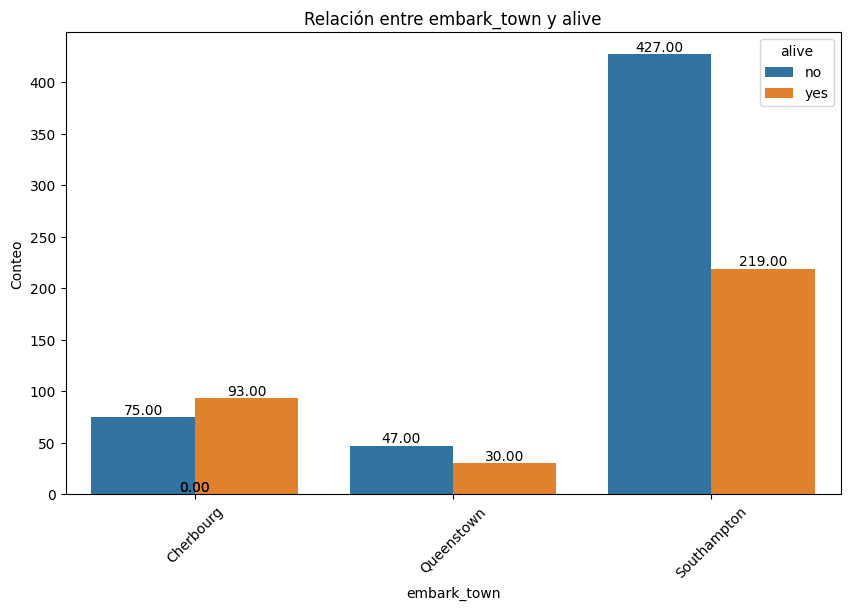

In [54]:
plot_categorical_relationship_fin(titanic_copy, "embark_town", "alive", relative_freq=False, show_values=True)

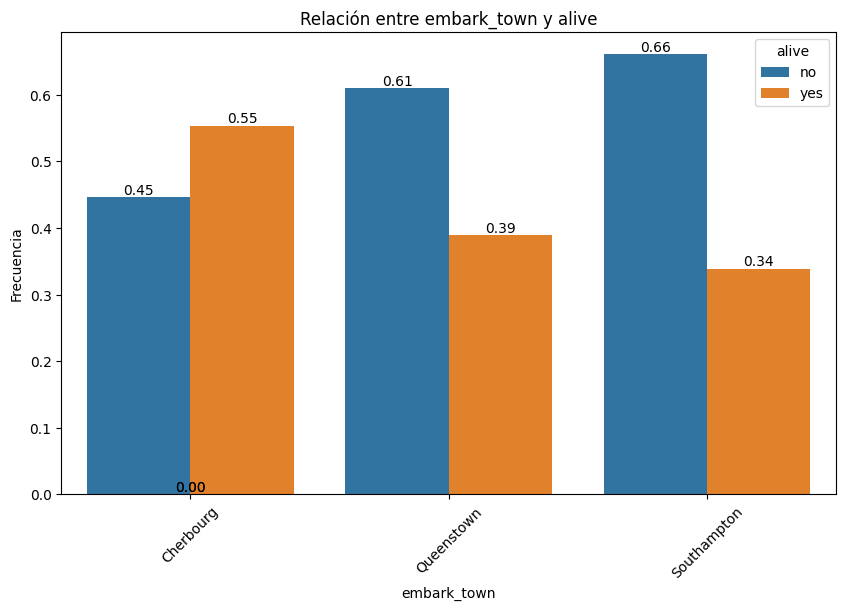

In [55]:
plot_categorical_relationship_fin(titanic_copy, "embark_town", "alive", relative_freq=True, show_values=True)

- Estas gráficas confirman visualmente lo que los datos y el chi‑cuadrado ya han mostrado:



- En términos absolutos, sobrevivieron más pasajeros que embarcaron en Southampton, simplemente porque era el puerto más grande. En términos relativos, la tasa de supervivencia fue mayor en Cherbourg (55%), seguida de Queenstown (39%) y Southampton (34%). El test chi‑cuadrado confirma que la ciudad de embarque está estadísticamente relacionada con la supervivencia. Las gráficas lo muestran claramente: embarcar en Cherbourg ofrecía mejores probabilidades de sobrevivir.

1.6.4 ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

- Aqui nos encontramos una variable numerica como es fare (el precio del tikect) y una variable categorica que es la survived (supervivencia). Para la variable numerica podemso calcular medias, medianas, cuartiles y rangos de precio segun supervivencia.

In [56]:
# Agrupamos por supervivencia y calculamos estadísticas del precio
fare_stats = titanic_copy.groupby("alive")["fare"].agg(["count", "mean", "median", "max", "min"])
print(fare_stats)

       count       mean  median       max  min
alive                                         
no       549  22.117887    10.5  263.0000  0.0
yes      342  48.395408    26.0  512.3292  0.0


- No he calculado la desviacion tipica porque la desviaicon tipica te dice cuanto se alejan los precios de la media, pero como en este estdio la media no es tan representativa lo es mas la mediana porque hay muchos outliers y la funcion de distribucion no es simetrica esta muy hacia la derecha por lo qe nos aporta bien poco la desviacion tipica.

(2,)


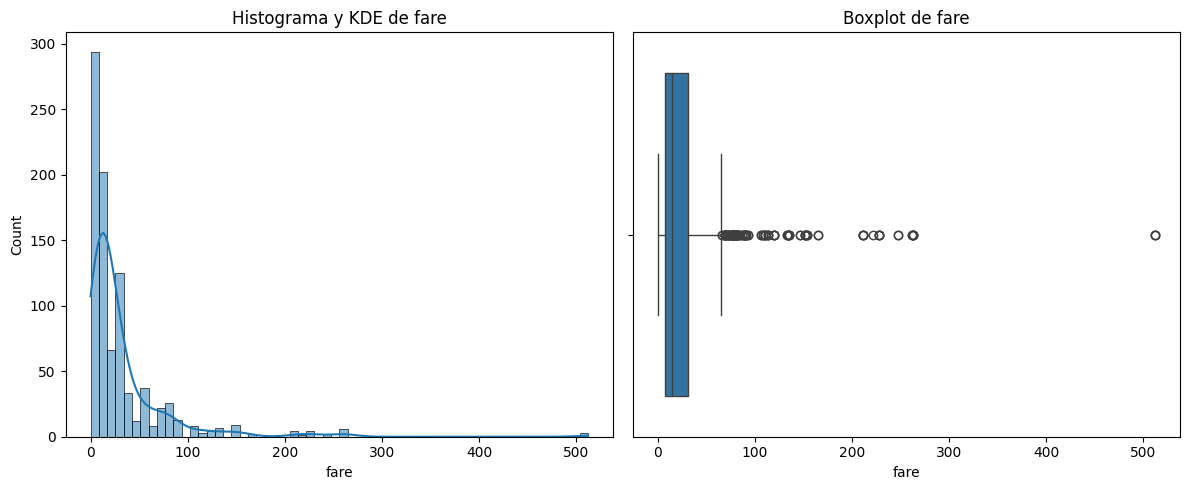

In [57]:
plot_combined_graphs(titanic_copy, ["fare"])

- En estas graficas podemos ver una distribucion muy sesgada a la derecha (por lo outlier con fares altos).
- Hay muchos pasajeros con fare bajos que pagaron menos dinero por el billete que los que pagaron precios mas altos por el billete. 
- El boxplot muestra que los supervivientes tienden a tener fares más altos.

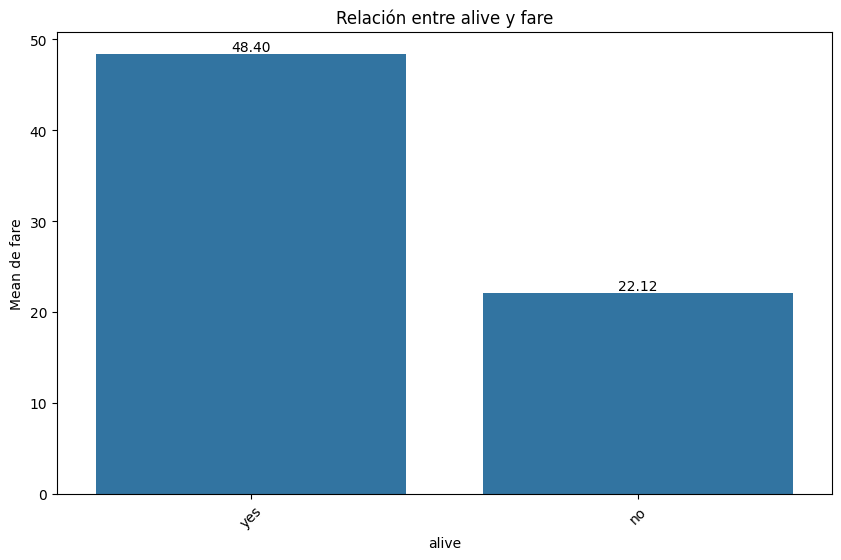

In [58]:
plot_categorical_numerical_relationship(titanic_copy, "alive", "fare", measure="mean", show_values=True)

- Esto muestra que el precio medio pagado por los supervivientes es mucho mayor que el de los fallecidos.

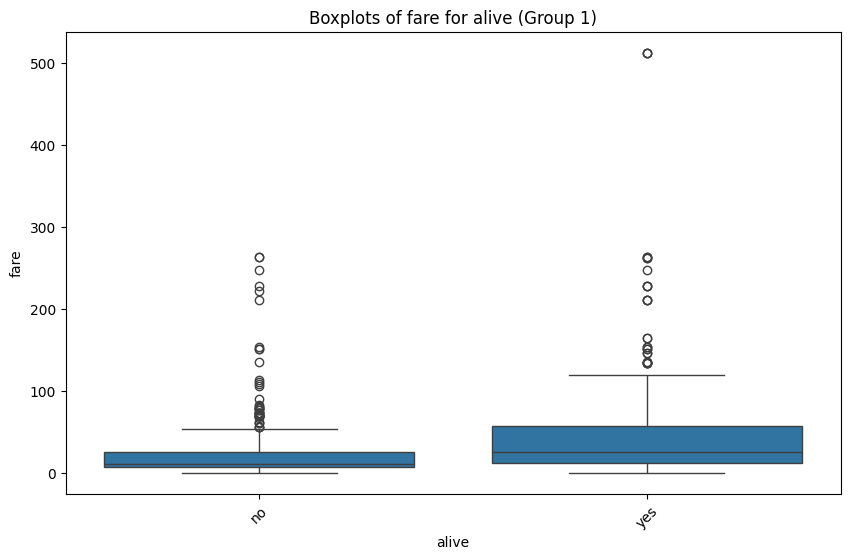

In [59]:
plot_grouped_boxplots(titanic_copy, "alive", "fare")

- Los pasajeros que sobrevivieron pagaron, en promedio, billetes más caros. La media y mediana del precio son significativamente mayores en el grupo de supervivientes. Las gráficas lo confirman: hay una clara tendencia a que los fares altos estén asociados con mayor probabilidad de supervivencia. Lo que confirma la relación entre clase socioeconómica y probabilidad de supervivencia

1.6.5 Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

(2,)


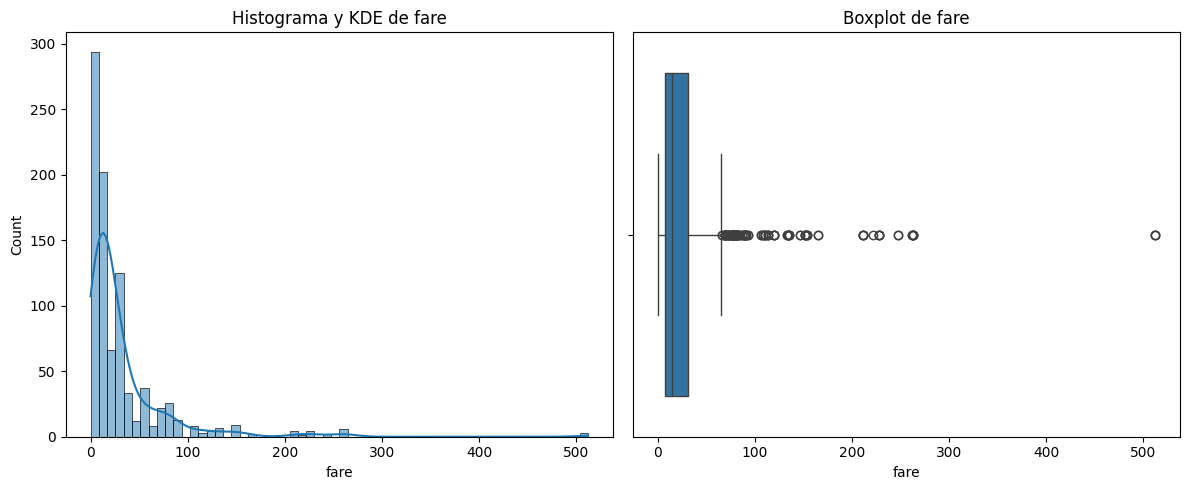

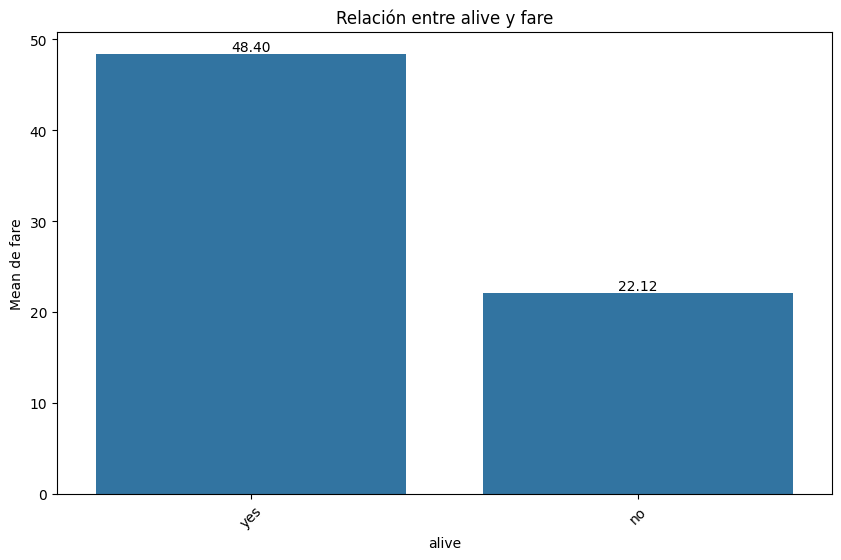

In [60]:
plot_combined_graphs(titanic_copy, ["fare"])
plot_categorical_numerical_relationship(titanic_copy, "alive", "fare", measure="mean", show_values=True)

In [61]:
# 1. Valor máximo de fare
max_fare = titanic_copy["fare"].max()
print("El billete más caro costó:", max_fare)

# 2. Filtrar el/los pasajeros que pagaron ese billete
pasajero_max_fare = titanic_copy[titanic_copy["fare"] == max_fare]

# Mostrar columnas que sí existen
print(pasajero_max_fare[["class", "fare", "alive", "sex", "embark_town"]])

El billete más caro costó: 512.3292
     class      fare alive     sex embark_town
258  First  512.3292   yes  female   Cherbourg
679  First  512.3292   yes    male   Cherbourg
737  First  512.3292   yes    male   Cherbourg


- En la grafica del histograma se puede observar que hay barra en 0 por lo que si hubo gente que no pago que entiendo que serian empleados, gente a los que le regalaron los tikects. y en la grafica y en la base de datos encuentro que hubo tres personas que pagaron el precio mas alto 512(dos hombres y una mujer y fue en el puerto de Cherbourg).

1.6.6 Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

- Aqui tenemos dos varibales categoricas con una numerica.

- Voy agrupar con groupby por puerto y por supervivientes,  y voy  amedir todos los parametro de media, mediana y cuenta de los pasajeros que hay en cada grupo.

In [63]:
fare_by_city_alive = titanic_copy.groupby(["embark_town", "alive"])["fare"].agg(["mean", "median", "count"])
print(fare_by_city_alive)

                        mean    median  count
embark_town alive                            
Cherbourg   no     35.443335  14.45830     75
            yes    79.720926  56.92920     93
Queenstown  no     13.335904   7.75000     47
            yes    13.182227   7.80835     30
Southampton no     20.743987  10.50000    427
            yes    39.916514  26.00000    219


Conclusiones:

- Cherbourg: los supervivientes pagaron billetes mucho más caros que los fallecidos.

- Southampton: también se observa que los supervivientes tenían fares más altos.

- Queenstown: apenas hay diferencia, todos viajaban con billetes baratos.

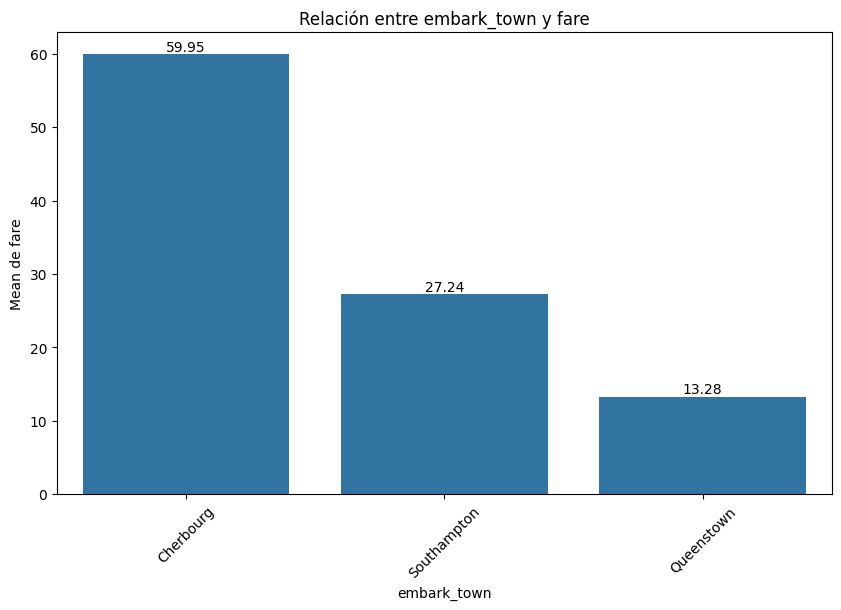

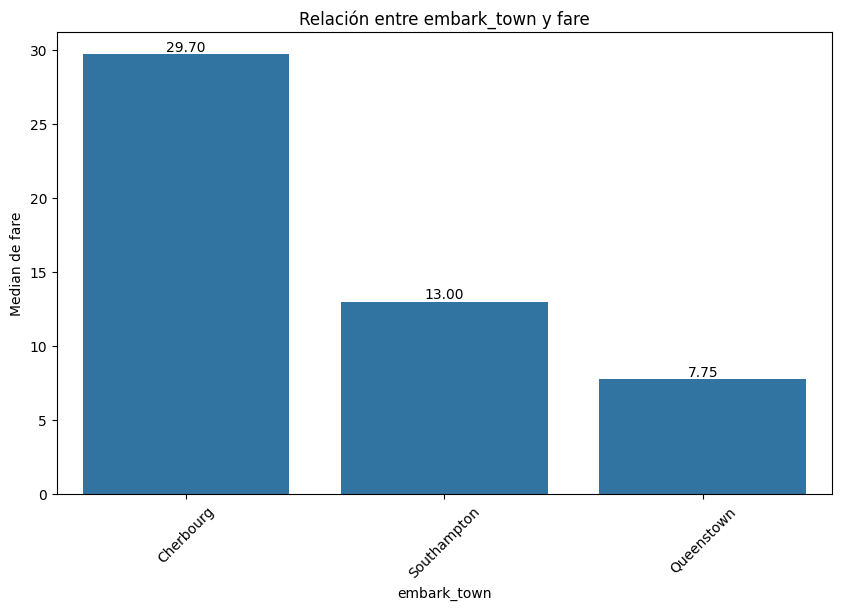

In [45]:
plot_categorical_numerical_relationship(titanic_copy, "embark_town", "fare", measure="mean", show_values=True)
plot_categorical_numerical_relationship(titanic_copy, "embark_town", "fare", measure="median", show_values=True)

- Esto muestra el precio medio y mediano del billete por ciudad de embarque.

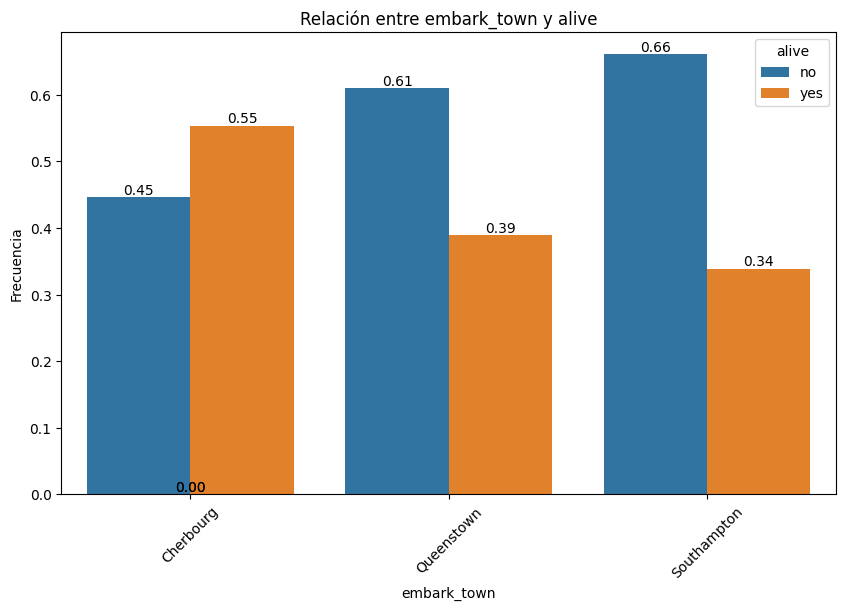

In [64]:
plot_categorical_relationship_fin(titanic_copy, "embark_town", "alive", relative_freq=True, show_values=True)

Aquí ves la proporción de supervivientes por ciudad, lo que complementa la información de los fares.

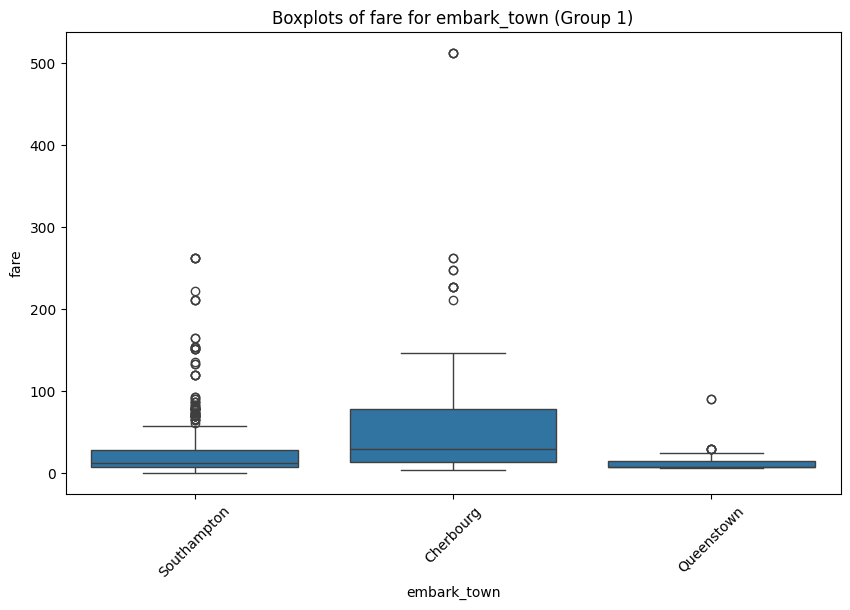

In [65]:
plot_grouped_boxplots(titanic_copy, "embark_town", "fare")

- Esta grafica muestra la dispersión de precios por ciudad, evidenciando que Cherbourg tenía billetes mucho más caros y mayor supervivencia.

Conclusión final:
- Existe una clara relación entre el dinero pagado, la ciudad de embarque y la supervivencia. Los pasajeros que embarcaron en Cherbourg pagaron billetes más caros y tuvieron mayor probabilidad de sobrevivir. En Southampton, los supervivientes también tenían fares más altos que los fallecidos. En Queenstown, los billetes eran baratos y la diferencia entre supervivientes y fallecidos fue mínima. Las gráficas y estadísticas muestran que el nivel socioeconómico, reflejado en el precio del billete y la ciudad de embarque, influyó directamente en las probabilidades de supervivencia.

1.6.7 Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

In [66]:
titanic_copy["age_group"] = np.where(titanic_copy["age"] < 16, "child", "adult")

In [67]:
class_age_stats = titanic_copy.groupby(["class", "age_group"])["alive_bin"].agg(
    alive_count="sum", total="count"
)
class_age_stats["alive_rate"] = class_age_stats["alive_count"] / class_age_stats["total"]
print(class_age_stats)

                  alive_count  total  alive_rate
class  age_group                                
First  adult              131    210    0.623810
       child                5      6    0.833333
Second adult               68    165    0.412121
       child               19     19    1.000000
Third  adult               94    433    0.217090
       child               25     58    0.431034


En términos absolutos:

- El grupo con más supervivientes fue First Class adultos, despues  adultos de tercera clase, despues adultos desegunda clase, despues niños de tercera clase, despue slos niños de segunda clase y por ulitmo los niños de primera clase.

En terminos relativos (% dentro de cada grupo):

- La tasa mas alta de supervivientes es de los niños de segunda clase, luego los niños de primera clase, luego los adultos de primera clase, luego ños niños de tercera clase, los adultos de segunda clase, y por ultimo los adultos de tercer clase. 

 


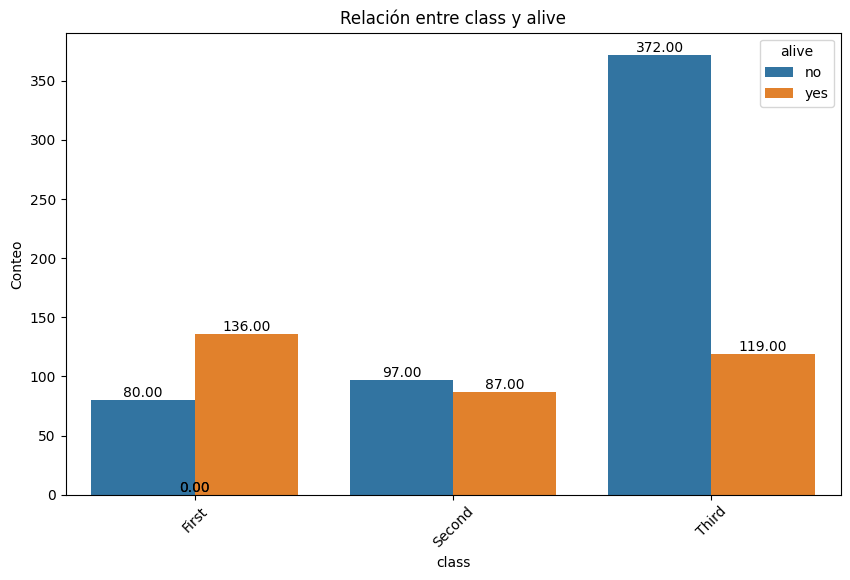

In [31]:
plot_categorical_relationship_fin(titanic_copy, "class", "alive", relative_freq=False, show_values=True)

- Aquí  vemos los conteos por clase

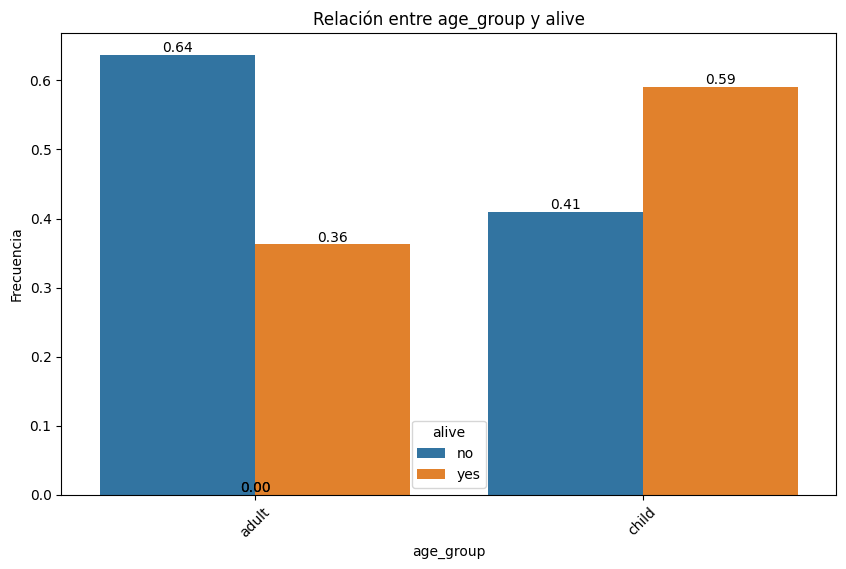

In [32]:
plot_categorical_relationship_fin(titanic_copy, "age_group", "alive", relative_freq=True, show_values=True)

- Esto muestra la proporción de supervivencia entre adultos y niños.

- Y por ultimo queda ver en terminos relativos la proporcion de adultos y niños que sobrevivieron y por clase.

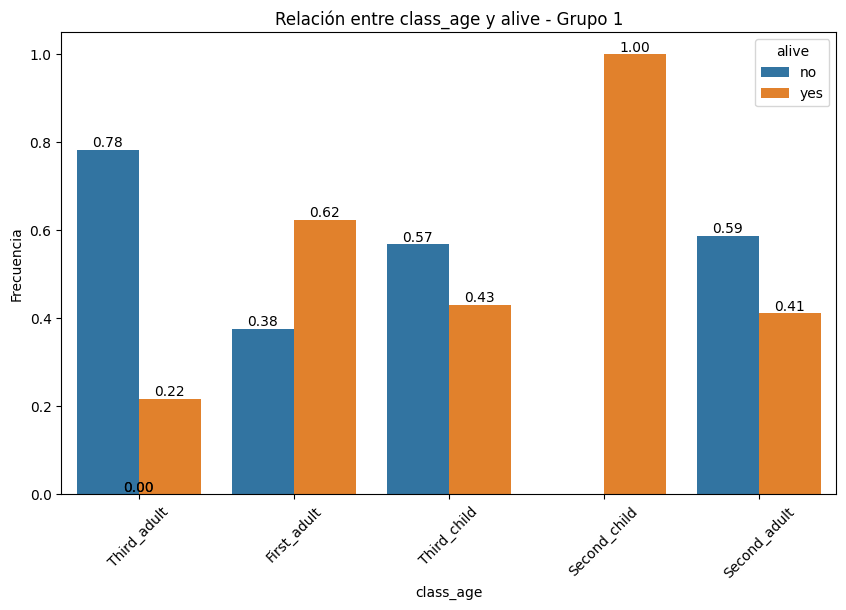

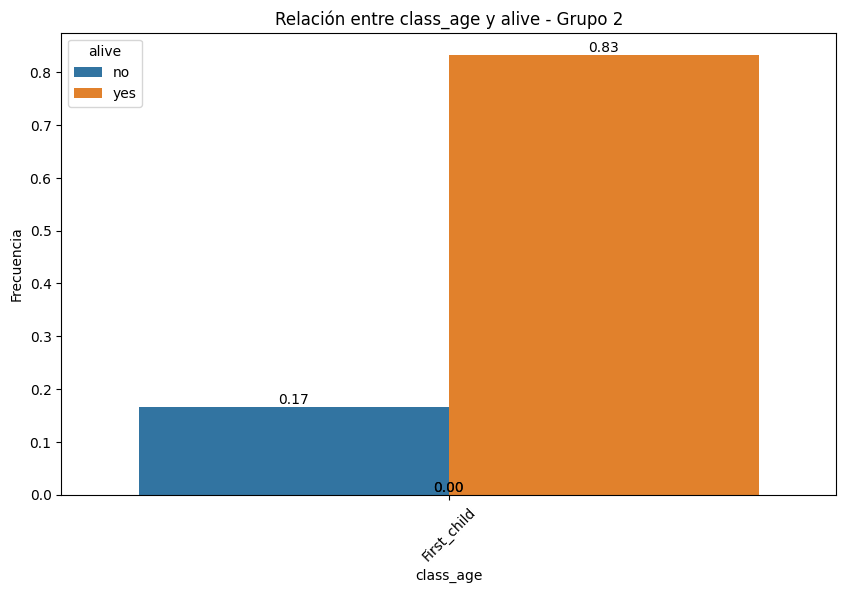

In [52]:
titanic_copy["class_age"] = titanic_copy["class"] + "_" + titanic_copy["age_group"]
plot_categorical_relationship_fin(titanic_copy, "class_age", "alive", relative_freq=True, show_values=True)

Conclusión final: 
- Al combinar clase y edad, vemos que en términos absolutos sobrevivieron más adultos de Primera Clase. En términos relativos, los adultos de Primera Clase y los niños de Tercera Clase tuvieron las tasas de supervivencia más altas. Los adultos de Tercera Clase fueron el grupo con menor probabilidad de sobrevivir. Esto confirma que tanto la clase social como la edad influyeron de manera conjunta en las probabilidades de supervivencia.

1.6.8.Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [54]:
# Estadísticas agrupadas por supervivencia
age_fare_stats = titanic_copy.groupby("alive")[["age", "fare"]].agg(["mean", "median"])
print(age_fare_stats)


             age              fare       
            mean median       mean median
alive                                    
no     31.169758   32.0  22.117887   10.5
yes    28.954503   31.0  48.395408   26.0


Interpretación:

- Edad: la diferencia entre fallecidos y supervivientes es pequeña (los fallecidos eran ligeramente mayores).

- Fare: los supervivientes pagaron billetes significativamente más caros, tanto en media como en mediana.

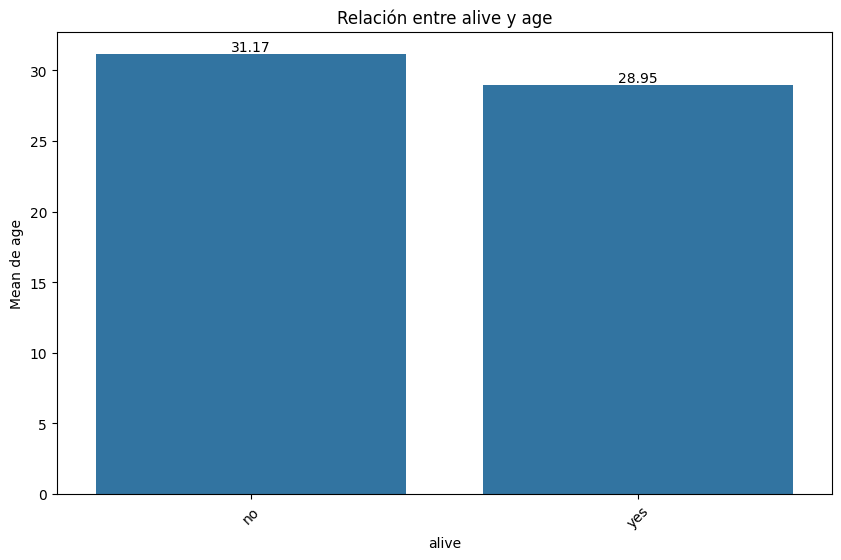

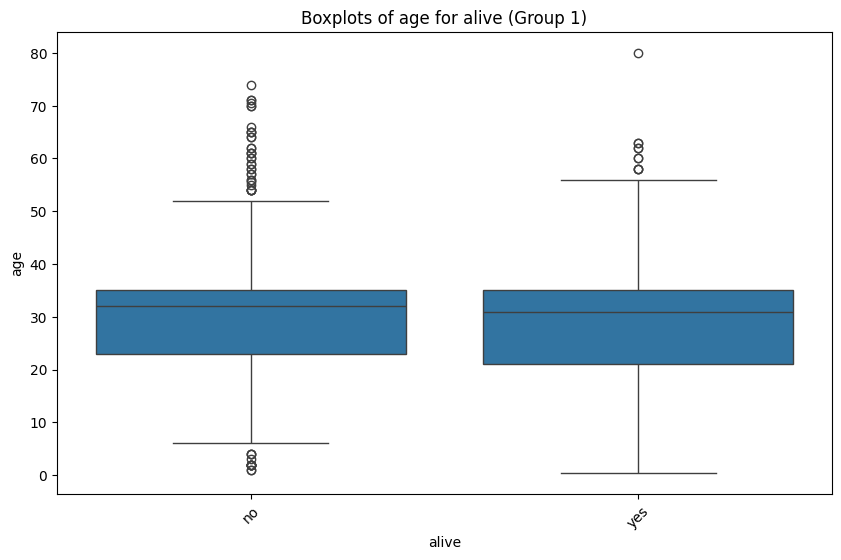

In [55]:
plot_categorical_numerical_relationship(titanic_copy, "alive", "age", measure="mean", show_values=True)
plot_grouped_boxplots(titanic_copy, "alive", "age")

- Muestra que la edad media de supervivientes y fallecidos es similar, aunque los fallecidos incluyen más adultos mayores

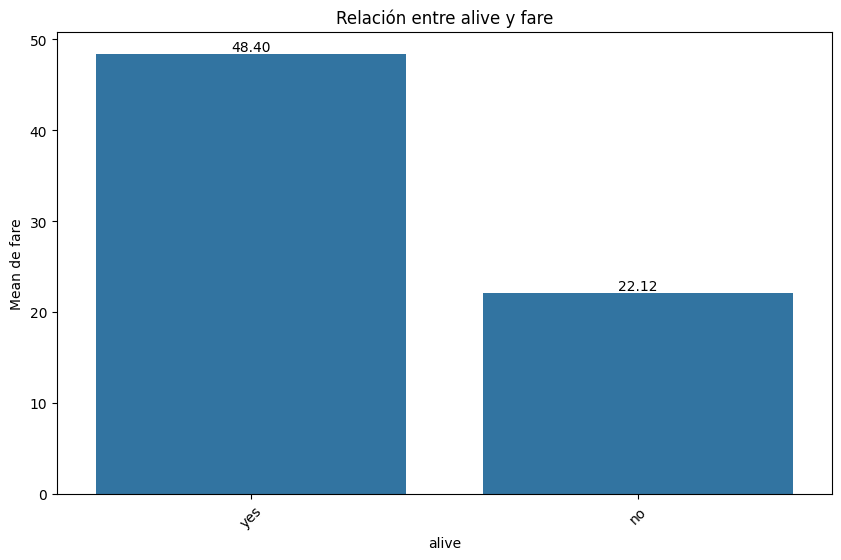

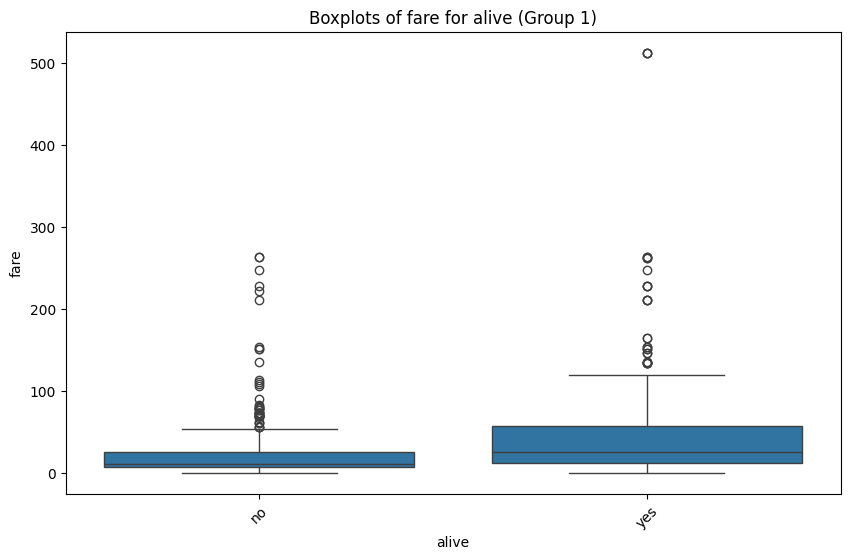

In [69]:
plot_categorical_numerical_relationship(titanic_copy, "alive", "fare", measure="mean", show_values=True)
plot_grouped_boxplots(titanic_copy, "alive", "fare")

- Aquí se ve claramente que los supervivientes pagaron fares más altos.

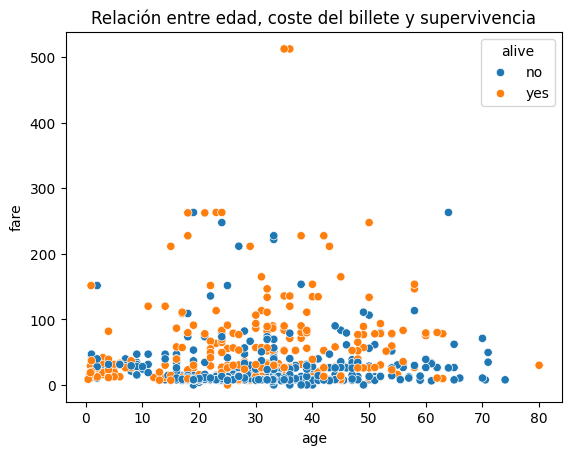

In [58]:
sns.scatterplot(data=titanic_copy, x="age", y="fare", hue="alive")
plt.title("Relación entre edad, coste del billete y supervivencia")
plt.show()

- Los supervivientes se concentran en fares más altos.

- La edad no marca una diferencia tan clara, aunque los niños tienen cierta ventaja.

- La combinación jóvenes + billetes caros está asociada con mayor supervivencia.

Conclusión final:
La edad por sí sola no muestra una diferencia marcada entre supervivientes y fallecidos, aunque los niños tuvieron cierta ventaja. El coste del billete sí está claramente relacionado: los supervivientes pagaron billetes más caros. Al combinar edad y coste, vemos que los pasajeros jóvenes con billetes caros —es decir, niños y adultos de Primera Clase— tuvieron las mayores probabilidades de sobrevivir. En cambio, los adultos de Tercera Clase, con billetes baratos, fueron el grupo más vulnerable.

## #EXTRA: Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #EXTRA.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [2]:
df_air_jun = pd.read_csv("./data/dataset_viajes_jun.csv")
df_air_jun

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23
...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23


In [25]:
df_air_jun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   aircompany  600 non-null    object  
 1   origen      600 non-null    object  
 2   destino     600 non-null    object  
 3   distancia   600 non-null    int64   
 4   avion       600 non-null    object  
 5   con_escala  600 non-null    bool    
 6   consumo_kg  600 non-null    float64 
 7   duracion    600 non-null    int64   
 8   ingresos    600 non-null    float64 
 9   id_vuelo    600 non-null    object  
 10  mes         600 non-null    object  
 11  cat_vuelo   600 non-null    category
dtypes: bool(1), category(1), float64(2), int64(2), object(6)
memory usage: 48.4+ KB


### #EXTRA.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


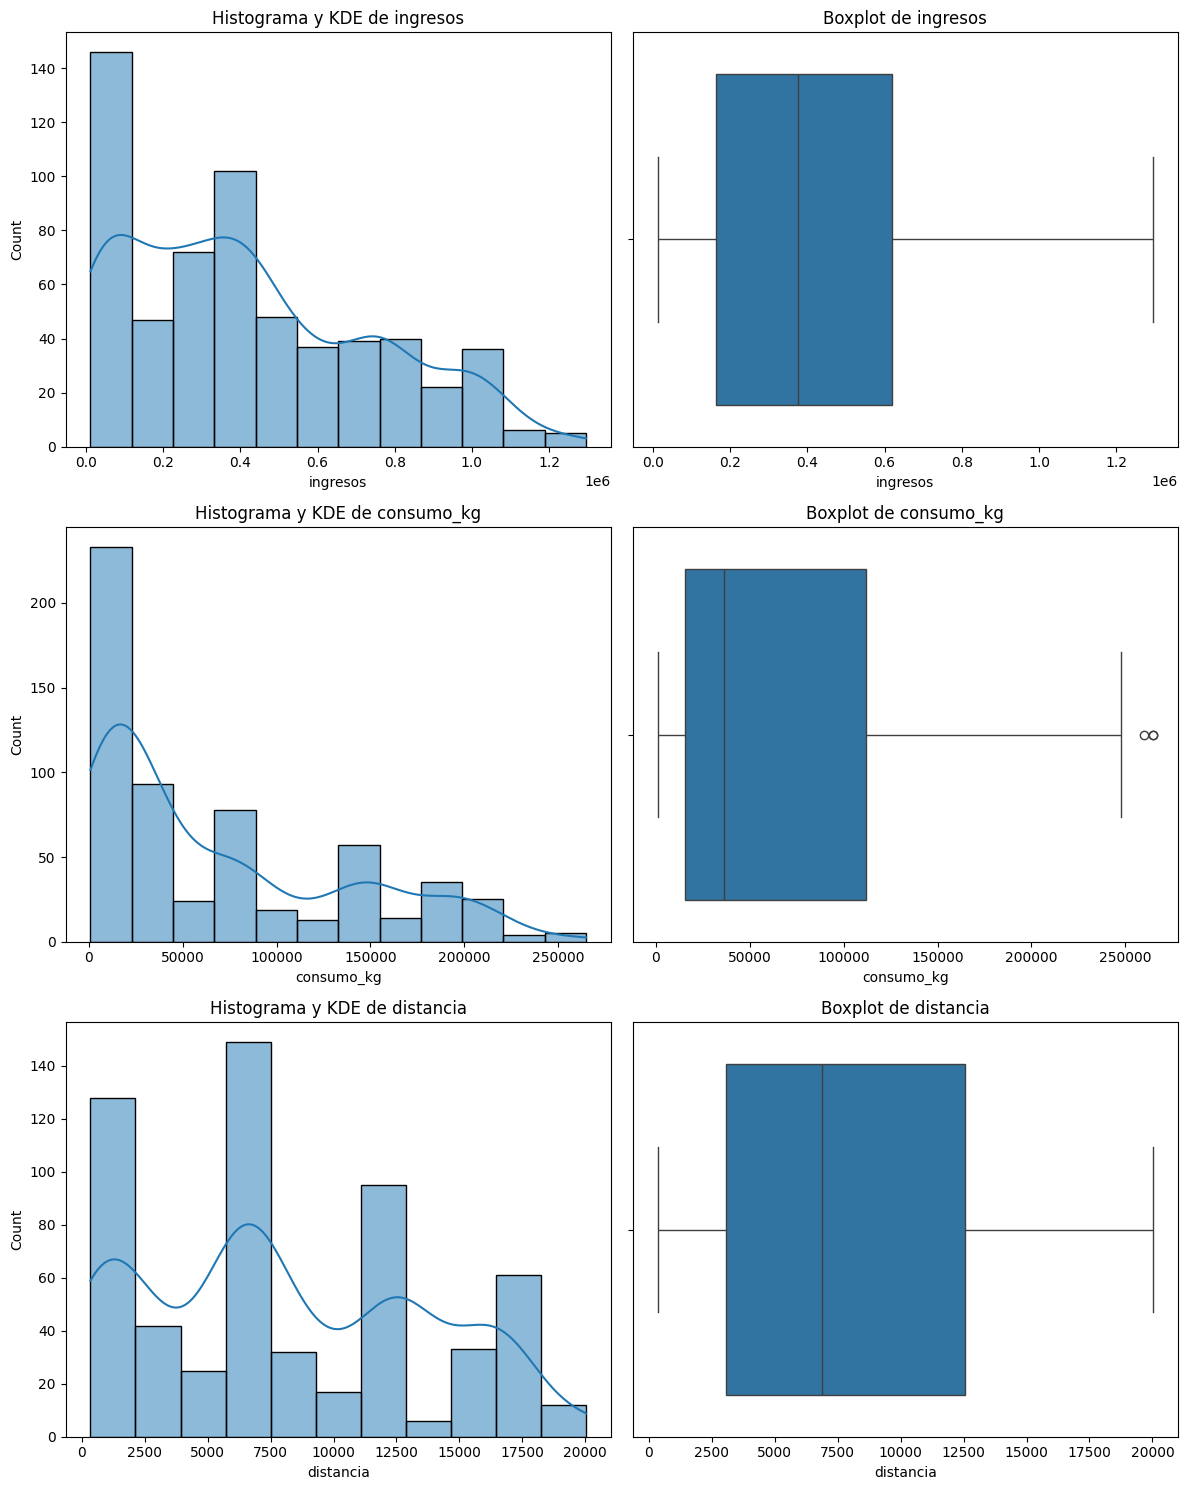

In [6]:
plot_combined_graphs(df_air_jun,["ingresos","consumo_kg","distancia"])

Conclusiones:

- Ingresos y consumo aumentan con la distancia, pero no de forma proporcional.

- Hay un segmento intermedio (distancias medias/largas) donde el ratio ingresos/consumo es más eficiente.

- Los vuelos muy cortos tienen bajo consumo pero también ingresos limitados.

- Los vuelos muy largos generan más ingresos, pero con mayor dispersión y consumo elevado.

-Quizas lo mejor para Tabaair lo mejor es estar en ese rango medio

Vamos a crear un Dataframe por cada compñia voy a meter los ingresos y consumo combutible de cada compañia.

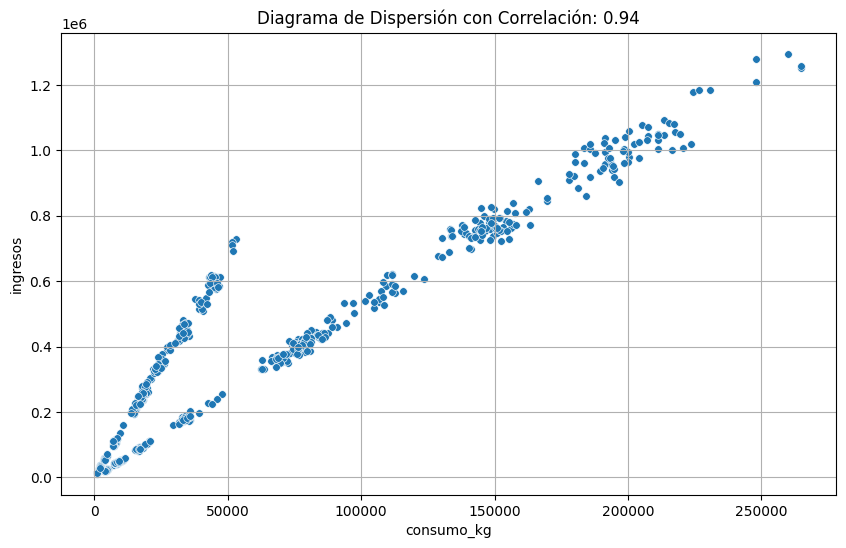

In [12]:
grafico_dispersion_con_correlacion(df_air_jun,"consumo_kg", "ingresos", mostrar_correlacion= True, tamano_puntos= 30)

- Aqui vemos dos lineas tambien diferencias y observamos que para un mismo consumo la linea de arriba es mas eficiente.

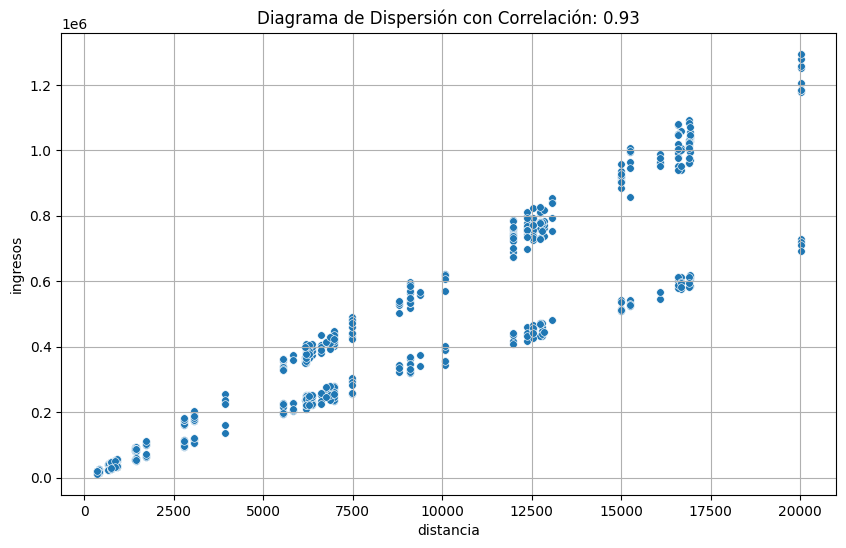

In [13]:
grafico_dispersion_con_correlacion(df_air_jun,"distancia","ingresos", mostrar_correlacion= True, tamano_puntos= 30)

- Aqui vemos dos lineas y vemos que la que ba por arriba para una misma distancia da mas ingresos es mas eficiente.

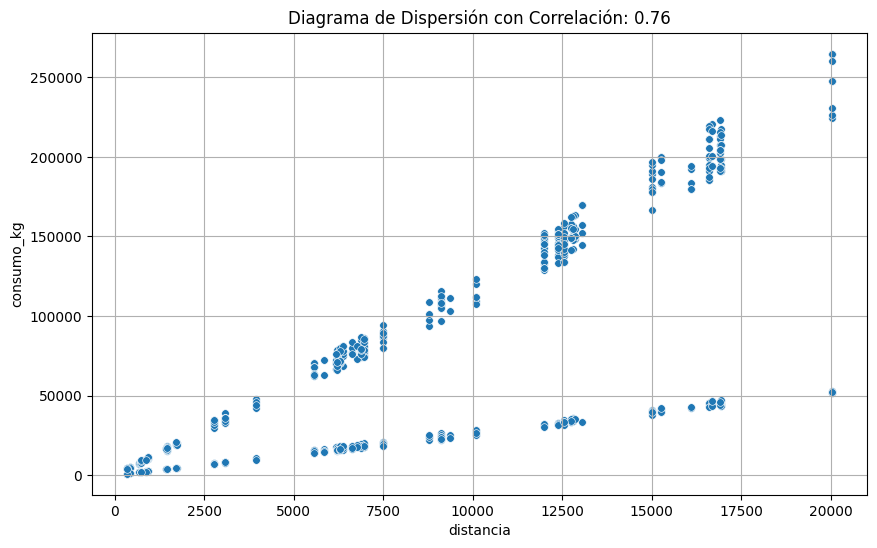

In [14]:
grafico_dispersion_con_correlacion(df_air_jun,"distancia","consumo_kg", mostrar_correlacion= True, tamano_puntos= 30)

- Aqui vemos que la linea de abajo es muy eficiente en consumo que es la que va por abajo.

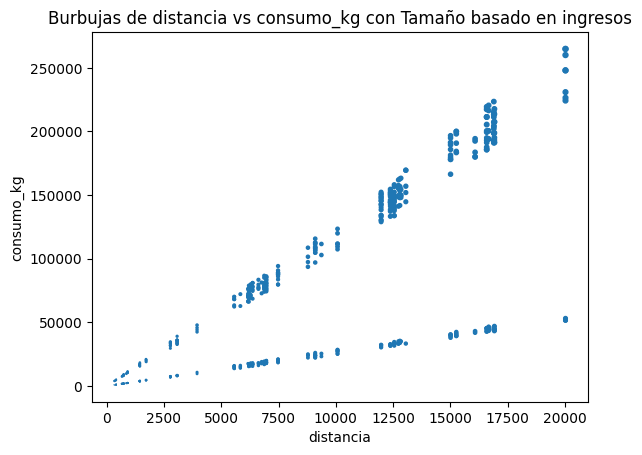

In [19]:
bubble_plot(df_air_jun,"distancia","consumo_kg","ingresos", scale = 100000)

-Aqui lo que hago es ver para cada uno de las compañias

- En todos los analisis bivariante podemos ver dos rectas en todas las compañias, y viendo los consumos e ingresos en las graficas puedo pensar que una recta es para lo vuelos largos y otra para los vuelos no tan largos y por las pendientes puedo llegar a pensar que los vuelos no tan largos son mucho mas eficientes que los vuelos largos ya que para un mismo gasto de combustible obtenemos mas ingresos segun veo ahi.

-Aqui estan todas las pendientes en una unica grafica.

### #EXTRA.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Realiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

- Aqui voy a ver el volumen de vuelos de cada compañia

In [7]:
# Mostrar viajes por compañía aérea
viajes_por_compania = df_air_jun["aircompany"].value_counts()
print(viajes_por_compania)

aircompany
TabarAir      142
MoldaviAir    133
PamPangea     117
FlyQ          108
Airnar        100
Name: count, dtype: int64


- Aqui vemos que la empresa con mas volumen de vuelos es la nuestra TabarAir

- En la siguiente grafica vamos a ver los ingresos segun la compañia que nos dara ya pistas de por donde seguir analizando.

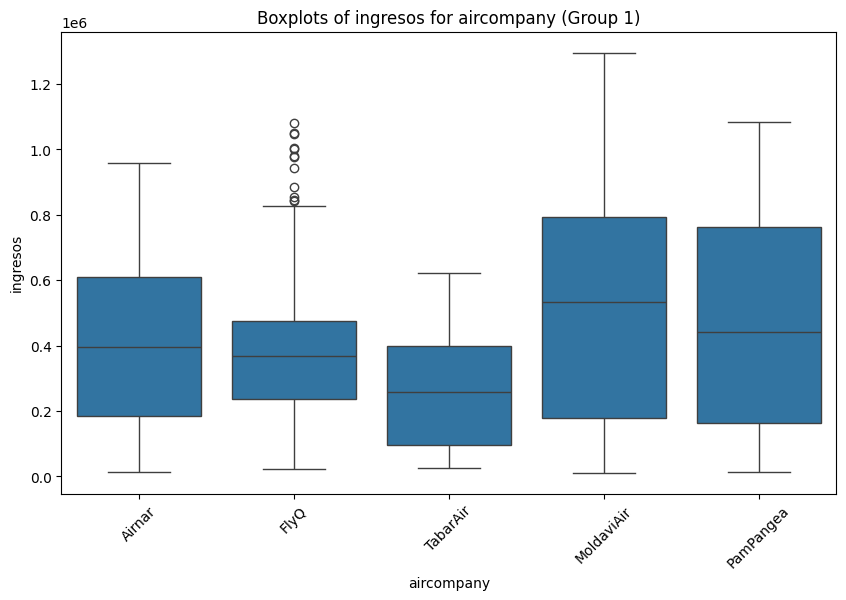

In [20]:
plot_grouped_boxplots(df_air_jun, cat_col="aircompany", num_col="ingresos")

- Aqui veo siendo de TabarAir que nuestra empresa genera pocos ingresos sabiendo que somos los que mas volumen de vuelo tenemos.Y enmpresas como Airnar que o FlyQ teniendo bastantante menos vuelos y tienen mas ingresos que nosotros. Quizas sea un problema de volumen de vuelos o que no estamos en el rango de vuelos que es mas eficiente.

- Lo que vamos hacer en la siguiente celda es binear distancias para asi poder trabajar con dos numericas y con una categorica 

In [ ]:
# Defino rangos fijos de distancia
bins = [0, 1500, 3000, 6000, df_air_jun["distancia"].max()]
labels = ["Corto", "Medio", "Largo", "Muy Largo"]

# Crear la variable categórica
df_air_jun["cat_vuelo"] = pd.cut(
    df_air_jun["distancia"], 
    bins=bins, 
    labels=labels, 
    include_lowest=True
)

# Verificar distribución
print("Distribución de vuelos por categoría:")
print(df_air_jun["cat_vuelo"].value_counts())

# Mostrar ejemplos
print("\nPrimeras filas con distancia y categoría:")
print(df_air_jun[["distancia","cat_vuelo"]].head())

Distribución de vuelos por categoría:
cat_vuelo
Muy Largo    398
Corto        117
Largo         56
Medio         29
Name: count, dtype: int64

Primeras filas con distancia y categoría:
   distancia  cat_vuelo
0        411      Corto
1      12738  Muy Largo
2       9103  Muy Largo
3       6370  Muy Largo
4       7480  Muy Largo


In [22]:
col_directora = "cat_vuelo"
col_1 = "ingresos"
col_2 = "consumo_kg"

diccionario_multivariante = {}

for valor in df_air_jun[col_directora].unique():
    diccionario_multivariante[valor] = df_air_jun.loc[df_air_jun[col_directora] == valor,[col_2,col_1]] 

Respuesta Corto:


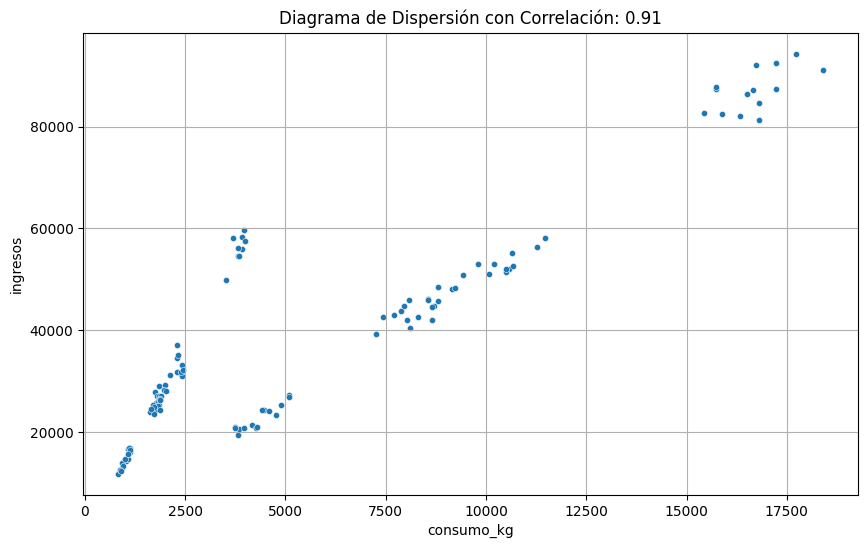

Respuesta Muy Largo:


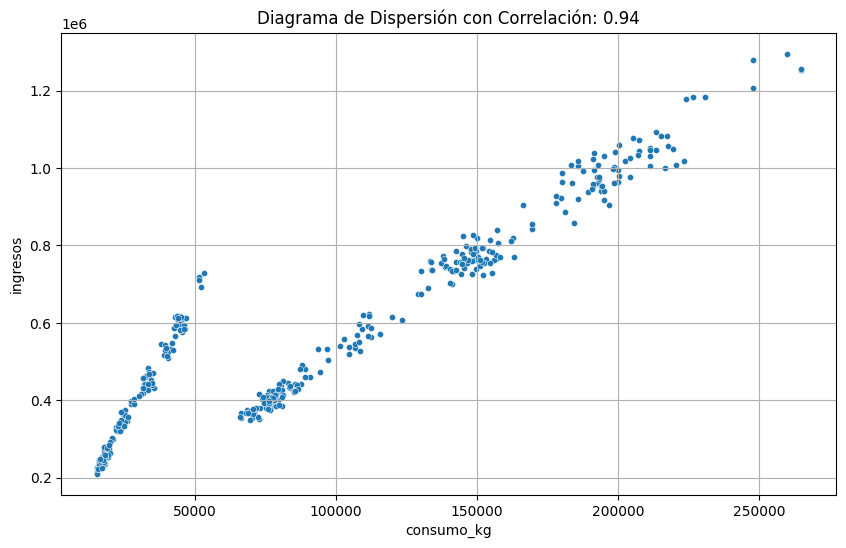

Respuesta Medio:


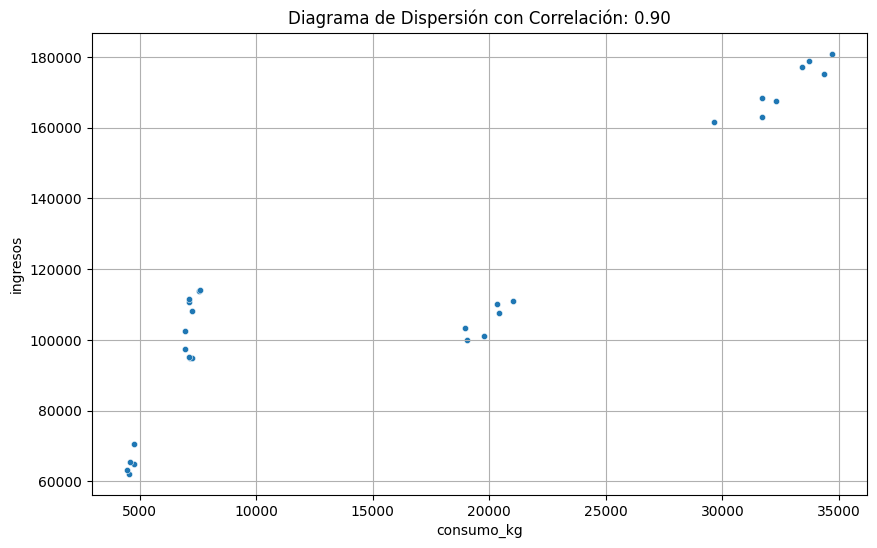

Respuesta Largo:


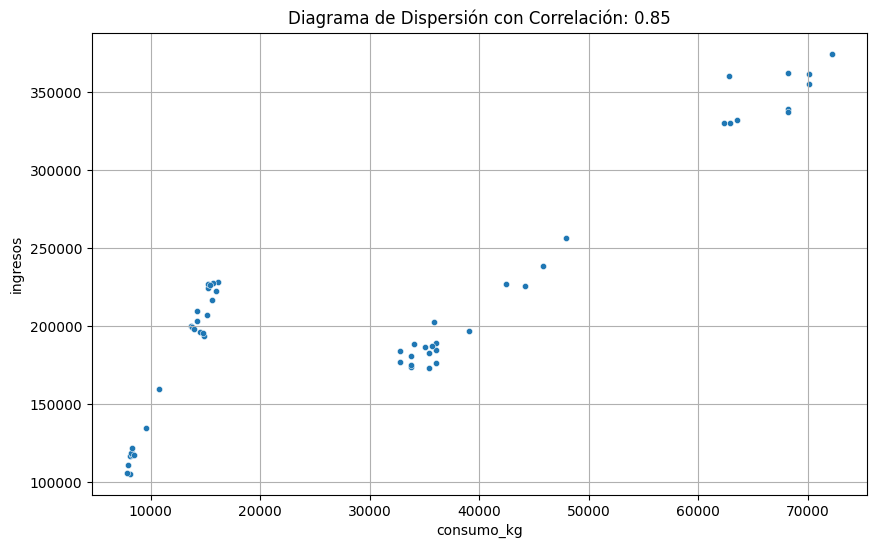

In [23]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

Distribución de vuelos por categoría:
cat_vuelo
Muy Largo    398
Corto        117
Largo         56
Medio         29
Name: count, dtype: int64

Primeras filas con distancia y categoría:
   distancia  cat_vuelo
0        411      Corto
1      12738  Muy Largo
2       9103  Muy Largo
3       6370  Muy Largo
4       7480  Muy Largo

Resumen por categoría de vuelo:


C:\Users\César\AppData\Local\Temp\ipykernel_28272\915908963.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen = df_air_jun.groupby("cat_vuelo").agg(


,cat_vuelo,volumen,ingresos_totales,ingreso_mediana,consumo_total,consumo_mediana,eficiencia
0,Corto,117,4.627073e+06,31762.470,6.802866e+05,3850.3920,6.801653
1,Medio,29,3.375420e+06,108115.020,4.761186e+05,7603.0661,7.089451
2,Largo,56,1.189538e+07,197356.860,1.706453e+06,32758.1800,6.970823
3,Muy Largo,398,2.313634e+08,521273.715,3.808145e+07,78746.9124,6.075488


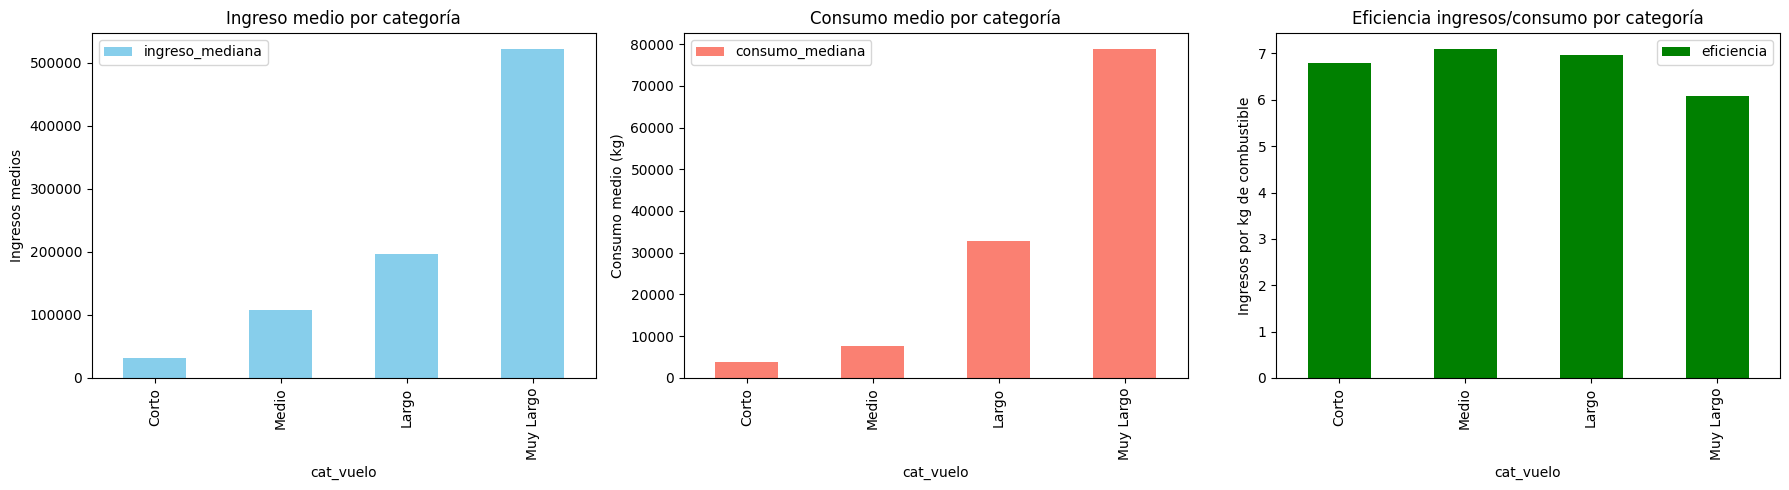

In [34]:

print("Distribución de vuelos por categoría:")
print(df_air_jun["cat_vuelo"].value_counts())

print("\nPrimeras filas con distancia y categoría:")
print(df_air_jun[["distancia","cat_vuelo"]].head())

# Análisis multivariante por categoría de vuelo
resumen = df_air_jun.groupby("cat_vuelo").agg(
    volumen=("id_vuelo","count"),
    ingresos_totales=("ingresos","sum"),
    ingreso_mediana=("ingresos","median"),
    consumo_total=("consumo_kg","sum"),
    consumo_mediana=("consumo_kg","median")
).reset_index()

# Calcular eficiencia como ratio ingresos/consumo
resumen["eficiencia"] = resumen["ingresos_totales"] / resumen["consumo_total"]

print("\nResumen por categoría de vuelo:")
display(resumen)

# Visualización comparativa
fig, axes = plt.subplots(1,3, figsize=(18,5))

# Ingresos medios por categoría
resumen.plot(x="cat_vuelo", y="ingreso_mediana", kind="bar", ax=axes[0], color="skyblue")
axes[0].set_title("Ingreso medio por categoría")
axes[0].set_ylabel("Ingresos medios")

# Consumo medio por categoría
resumen.plot(x="cat_vuelo", y="consumo_mediana", kind="bar", ax=axes[1], color="salmon")
axes[1].set_title("Consumo medio por categoría")
axes[1].set_ylabel("Consumo medio (kg)")

# Eficiencia por categoría
resumen.plot(x="cat_vuelo", y="eficiencia", kind="bar", ax=axes[2], color="green")
axes[2].set_title("Eficiencia ingresos/consumo por categoría")
axes[2].set_ylabel("Ingresos por kg de combustible")

plt.tight_layout()
plt.show()

In [ ]:
def plot_categorical_numerical_relationship_fin(df, cat_col1, cat_col2, num_col, show_values=False):
    plt.figure(figsize=(10,6))
    ax = sns.barplot(x=cat_col1, y=num_col, hue=cat_col2, data=df)
    plt.title(f'Relación entre {cat_col1} y {num_col} por {cat_col2}')
    plt.xlabel(cat_col1)
    plt.ylabel(num_col)
    plt.xticks(rotation=45)
    
    if show_values:
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}', 
                        (p.get_x() + p.get_width()/2., p.get_height()), 
                        ha='center', va='center', fontsize=9, color='black', 
                        xytext=(0,5), textcoords='offset points')
    plt.show()
    

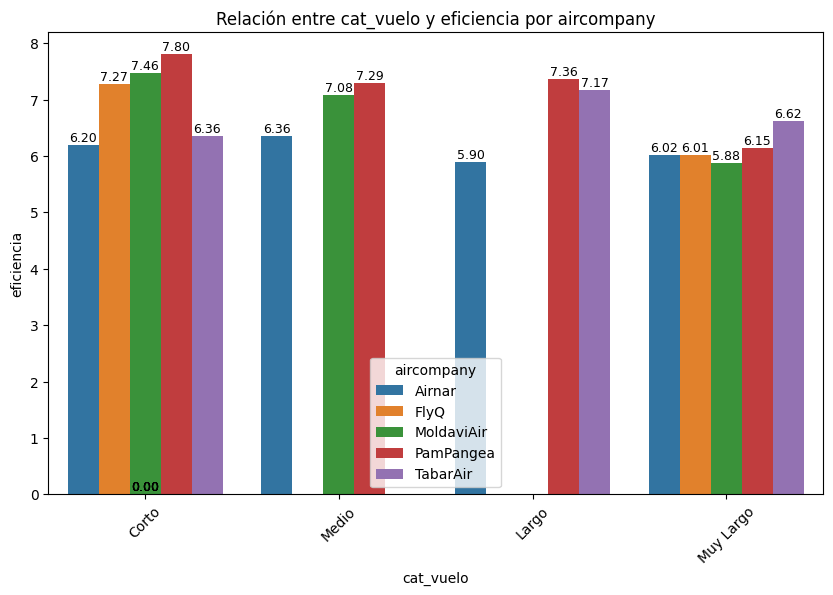

In [33]:
plot_categorical_numerical_relationship_fin(resumen, "cat_vuelo", "aircompany", "eficiencia", show_values=True)

- Aqui observo que la categoria de vuelo mas eficiente es la media 


Resumen por aerolínea y categoría de vuelo:


C:\Users\César\AppData\Local\Temp\ipykernel_28272\963335980.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen = df_air_jun.groupby(["aircompany","cat_vuelo"]).agg(


,aircompany,cat_vuelo,volumen,ingresos_totales,ingreso_mediana,consumo_total,consumo_mediana,eficiencia
0,Airnar,Corto,16,811995.49,42635.830,1.309619e+05,4681.290000,6.200243
1,Airnar,Medio,3,278980.16,103310.350,4.386951e+04,18940.155000,6.359318
2,Airnar,Largo,12,2021458.25,183714.160,3.426478e+05,34559.879900,5.899522
3,Airnar,Muy Largo,69,37416963.92,513682.120,6.214283e+06,81367.256400,6.021124
4,FlyQ,Corto,24,899354.93,34828.945,1.236581e+05,2361.585300,7.272916
5,FlyQ,Medio,0,0.00,NaN,0.000000e+00,NaN,NaN
6,FlyQ,Largo,0,0.00,NaN,0.000000e+00,NaN,NaN
7,FlyQ,Muy Largo,84,42475497.94,423044.550,7.063122e+06,72995.351500,6.013700
8,MoldaviAir,Corto,17,690677.63,20902.390,9.254158e+04,3849.888200,7.463430
9,MoldaviAir,Medio,17,1865409.66,101035.390,2.634919e+05,7225.677900,7.079572



Tabla comparativa de eficiencia por categoría y aerolínea:


aircompany,Airnar,FlyQ,MoldaviAir,PamPangea,TabarAir
cat_vuelo,,,,,
Corto,6.200243,7.272916,7.463430,7.801227,6.361024
Medio,6.359318,NaN,7.079572,7.294679,NaN
Largo,5.899522,NaN,NaN,7.356589,7.169179
Muy Largo,6.021124,6.013700,5.877218,6.148344,6.624835


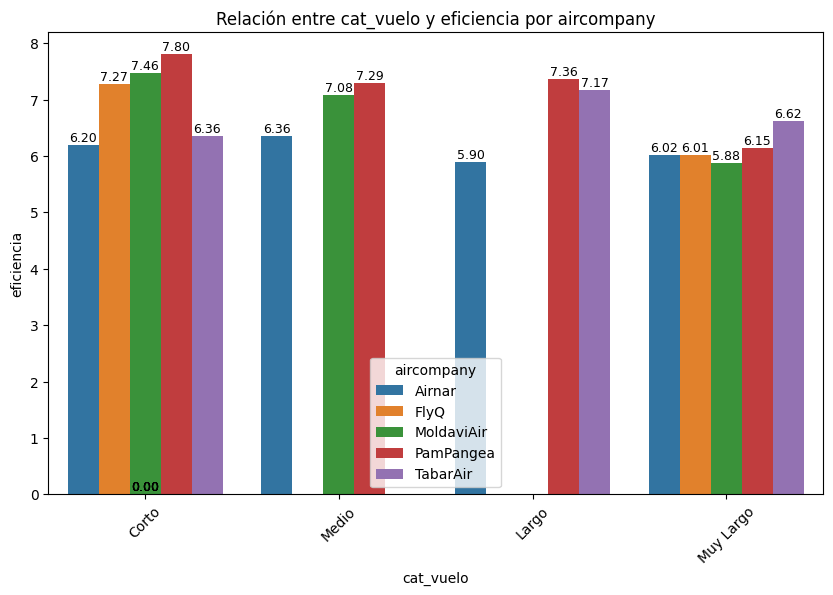

In [ ]:
# Análisis multivariante por aerolínea y categoría
resumen = df_air_jun.groupby(["aircompany","cat_vuelo"]).agg(
    volumen=("id_vuelo","count"),
    ingresos_totales=("ingresos","sum"),
    ingreso_mediana=("ingresos","median"),
    consumo_total=("consumo_kg","sum"),
    consumo_mediana=("consumo_kg","median")
).reset_index()

# Calcular eficiencia como ratio ingresos/consumo
resumen["eficiencia"] = resumen["ingresos_totales"] / resumen["consumo_total"]

print("\nResumen por aerolínea y categoría de vuelo:")
display(resumen)

# Pivotar para tener aerolíneas como columnas y categorías como filas
pivot = resumen.pivot(index="cat_vuelo", columns="aircompany", values="eficiencia")

print("\nTabla comparativa de eficiencia por categoría y aerolínea:")
display(pivot)

#Funcion modificada de Jaime 
def plot_categorical_numerical_relationship_fin(df, cat_col1, cat_col2, num_col, show_values=False):
    plt.figure(figsize=(10,6))
    ax = sns.barplot(x=cat_col1, y=num_col, hue=cat_col2, data=df)
    plt.title(f'Relación entre {cat_col1} y {num_col} por {cat_col2}')
    plt.xlabel(cat_col1)
    plt.ylabel(num_col)
    plt.xticks(rotation=45)
    
    if show_values:
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}', 
                        (p.get_x() + p.get_width()/2., p.get_height()), 
                        ha='center', va='center', fontsize=9, color='black', 
                        xytext=(0,5), textcoords='offset points')
    plt.show()
    
plot_categorical_numerical_relationship_fin(resumen, "cat_vuelo", "aircompany", "eficiencia", show_values=True)

In [28]:
# Tabla cruzada: cantidad de vuelos por compañía y tipo de vuelo
tabla_vuelos = pd.crosstab(df_air_jun["aircompany"], df_air_jun["cat_vuelo"])
print(tabla_vuelos)

cat_vuelo   Corto  Medio  Largo  Muy Largo
aircompany                                
Airnar         16      3     12         69
FlyQ           24      0      0         84
MoldaviAir     17     17      0         99
PamPangea      24      9     14         70
TabarAir       36      0     30         76


- Como conclusion hemos visto que el rango mas eficiente es el medio que es justo en el que TabaraAir nuestra empresa no compite por lo que si compitieramos ahi quizas aumentariamos mas los beneficios.

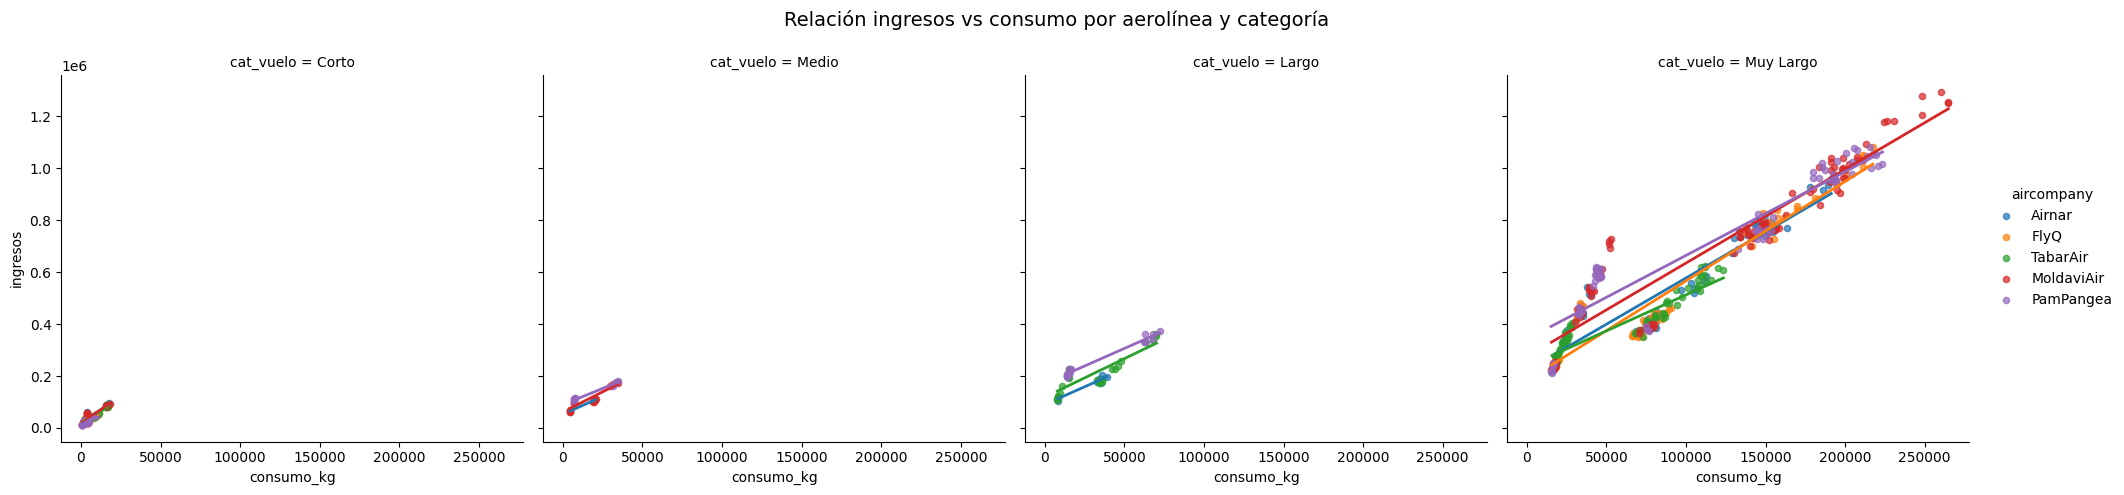

In [41]:
def plot_scatter_with_regression(df, col_x, col_y, hue_col=None, col_col=None,point_size=20, alpha=0.7, line_width=2, title=None):
    """
    Crea un scatter plot con rectas de regresión, agrupado por hue y/o col.
    """
    g = sns.lmplot(
        data=df,
        x=col_x,
        y=col_y,
        hue=hue_col,
        col=col_col,
        ci=None,
        scatter_kws={"s": point_size, "alpha": alpha},
        line_kws={"lw": line_width}
    )
    if title:
        plt.subplots_adjust(top=0.85)
        plt.suptitle(title, fontsize=14)
    plt.show()
plot_scatter_with_regression(
    df_air_jun,
    col_x="consumo_kg",
    col_y="ingresos",
    hue_col="aircompany",
    col_col="cat_vuelo",
    title="Relación ingresos vs consumo por aerolínea y categoría"
)

- Tambien otra hipotesis a reflejar es que TabarAir no opera vuelos y otras compañias apenas operan vuelos medios.